# TP1 - Linear Regression

William Liaw

## Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import t

%matplotlib inline

## Import data (Q1)

In [2]:
invest_dataframe = pd.read_csv("invest.txt", sep=' ')

## Preliminary data analysis (Q2)

In [3]:
invest_dataframe.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


In [4]:
invest_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      15 non-null     int64  
 1   gnp       15 non-null     float64
 2   invest    15 non-null     float64
 3   cpi       15 non-null     float64
 4   interest  15 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 732.0 bytes


In [5]:
invest_dataframe.describe()

,year,gnp,invest,cpi,interest
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1975.000000,1748.646667,276.006667,131.401333,7.452667
std,4.472136,738.145808,117.582691,40.286606,2.812245
min,1968.000000,873.400000,133.300000,82.540000,4.500000
25%,1971.500000,1131.750000,180.700000,98.005000,5.480000
50%,1975.000000,1549.200000,229.800000,125.790000,6.250000
75%,1978.500000,2290.850000,394.450000,156.920000,9.055000
max,1982.000000,3057.500000,471.500000,207.230000,13.420000


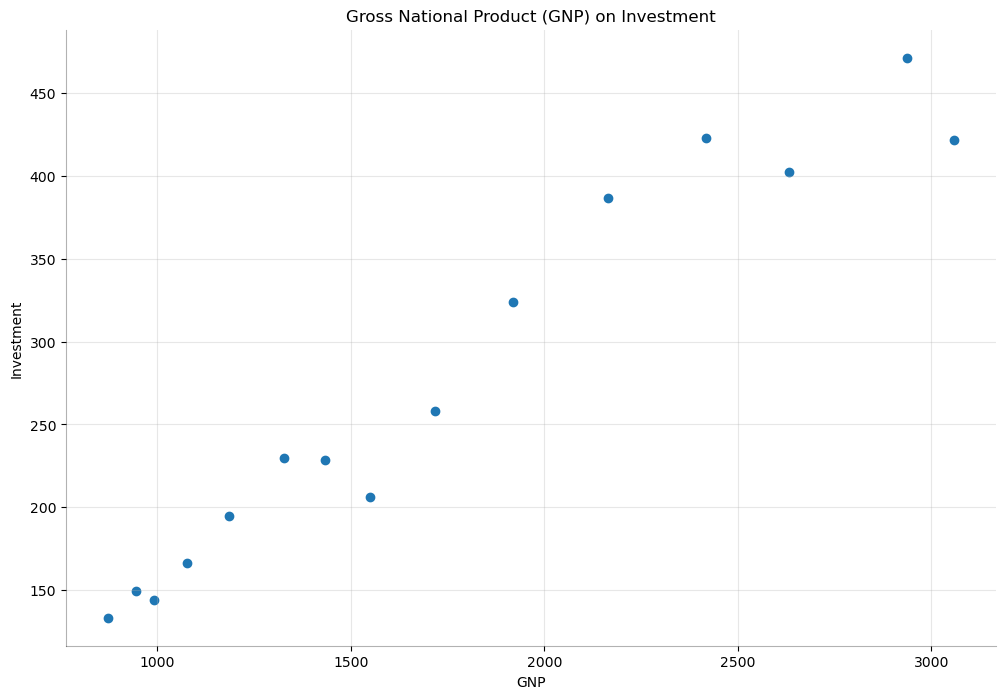

In [6]:
plt.figure(figsize=(12, 8))

plt.scatter(invest_dataframe["gnp"], invest_dataframe["invest"])

plt.title("Gross National Product (GNP) on Investment")
plt.xlabel("GNP")
plt.ylabel("Investment")

plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)
plt.grid(axis="both", alpha=0.3)
plt.show()

## Linear regression of Gross National Product on Investment (Q3)

In [7]:
gnp_mean = np.mean(invest_dataframe["gnp"])
invest_mean = np.mean(invest_dataframe["invest"])

beta1 = np.sum(
    (invest_dataframe["gnp"] - gnp_mean) * (invest_dataframe["invest"] - invest_mean)
) / np.sum((invest_dataframe["gnp"] - gnp_mean) ** 2)
beta0 = invest_mean - beta1 * gnp_mean

print(
    f"""
    Slope: {beta1:.5f}
    Intercept: {beta0:.5f}
    """
)


    Slope: 0.15496
    Intercept: 5.02994
    


In [8]:
def linear_function(x, beta0=beta0, beta1=beta1):
    return beta0 + beta1 * x

In [9]:
y = linear_function(invest_dataframe["gnp"])
n = len(invest_dataframe["gnp"])

sigma2 = np.sum((invest_dataframe["invest"] - y) ** 2) / (n - 2)

beta0_variance = sigma2 * (
    1 / n + gnp_mean**2 / np.sum((invest_dataframe["gnp"] - gnp_mean) ** 2)
)
beta1_variance = sigma2 / np.sum((invest_dataframe["gnp"] - gnp_mean) ** 2)

deterination_coefficient = 1 - np.sum((y - invest_dataframe["invest"]) ** 2) / np.sum(
    (invest_dataframe["invest"] - invest_mean) ** 2
)

print(
    f"""
    Intercept standard deviation: {np.sqrt(beta0_variance):.5f}
    Slope standard deviation: {np.sqrt(beta1_variance):.5f}
    Determination coefficient: {deterination_coefficient:.5f}
    """
)


    Intercept standard deviation: 19.32297
    Slope standard deviation: 0.01023
    Determination coefficient: 0.94636
    


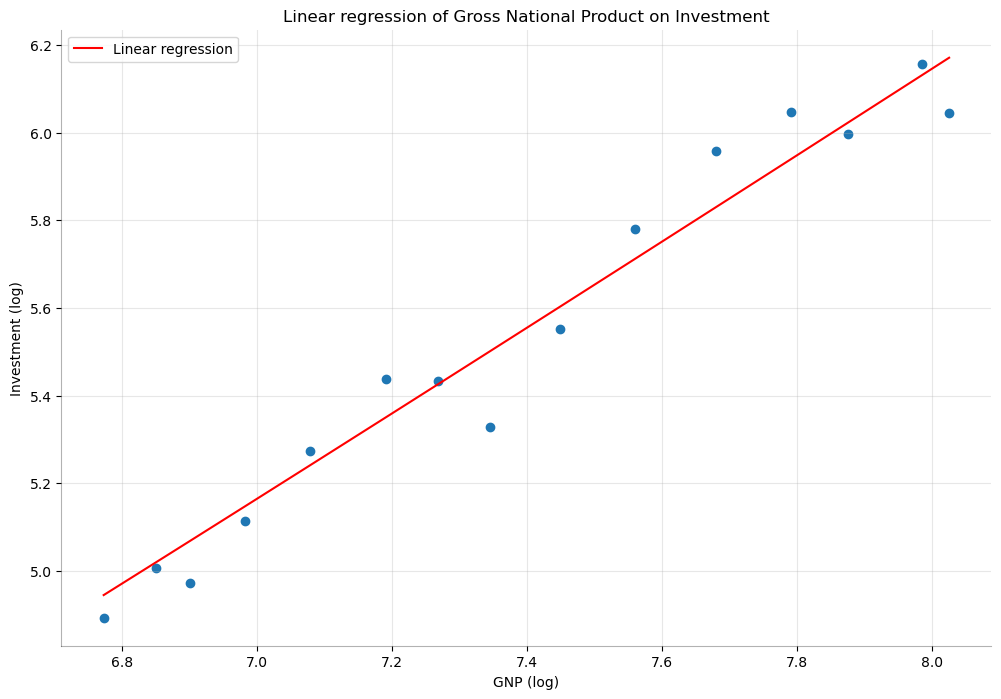

In [10]:
plt.figure(figsize=(12, 8))

plt.plot(
    np.log(invest_dataframe["gnp"]), np.log(y), label="Linear regression", color="r"
)
plt.scatter(np.log(invest_dataframe["gnp"]), np.log(invest_dataframe["invest"]))

plt.title("Linear regression of Gross National Product on Investment")
plt.xlabel("GNP (log)")
plt.ylabel("Investment (log)")
plt.grid(axis="both", alpha=0.3)
plt.legend()

plt.gca().spines[["top", "right"]].set_alpha(0.0)
plt.gca().spines[["bottom", "left"]].set_alpha(0.3)

plt.show()

## Hypothesis testing (Q4)

In [11]:
# Student-t test
alpha = 0.05
degrees_of_freedom = n - (1 + 1)

test1 = beta1 / np.sqrt(beta1_variance)

inf = -t.ppf(1 - alpha / 2, degrees_of_freedom)
sup = t.ppf(1 - alpha / 2, degrees_of_freedom)

p_value = 1 - t.cdf(test1, degrees_of_freedom)

print(
    f"""
    Value of test : {test1:.5f}
    Interval : [{inf:.5f}, {sup:.5f}]
    p-value : {p_value:.5g}
    """
)


    Value of test : 15.14485
    Interval : [-2.16037, 2.16037]
    p-value : 6.1305e-10
    


In [12]:
print("Null hypothesis (H0): beta1 = 0")
print("H0 rejected") if test1 < inf or test1 > sup else print("H0 not rejected")

Null hypothesis (H0): beta1 = 0
H0 rejected


## Confidence intervals (Q5)

In [13]:
x = 1000
y = linear_function(x)

alpha = 0.1
inf = -t.ppf(1 - alpha / 2, degrees_of_freedom)
sup = t.ppf(1 - alpha / 2, degrees_of_freedom)

ci_inf = y + inf * np.sqrt(sigma2) * np.sqrt(
    1 / n + (x - gnp_mean) ** 2 / np.sum((invest_dataframe["gnp"] - gnp_mean) ** 2)
)
ci_sup = y + sup * np.sqrt(sigma2) * np.sqrt(
    1 / n + (x - gnp_mean) ** 2 / np.sum((invest_dataframe["gnp"] - gnp_mean) ** 2)
)

pi_inf = y + inf * np.sqrt(sigma2) * np.sqrt(
    1 + 1 / n + (x - gnp_mean) ** 2 / np.sum((invest_dataframe["gnp"] - gnp_mean) ** 2)
)
pi_sup = y + sup * np.sqrt(sigma2) * np.sqrt(
    1 + 1 / n + (x - gnp_mean) ** 2 / np.sum((invest_dataframe["gnp"] - gnp_mean) ** 2)
)

print(
    f"""
    Confidence interval : [{ci_inf:.5f} , {ci_sup:.5f}]
    Prediction interval : [{pi_inf:.5f} , {pi_sup:.5f}]
    """
)


    Confidence interval : [141.25846 , 178.72879]
    Prediction interval : [106.55529 , 213.43195]
    
